In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
from tqdm.autonotebook import tqdm

from xhistogram.xarray import histogram
import cartopy.crs as ccrs
import cartopy
import matplotlib.ticker as mticker
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [7]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df = pd.read_csv('https://storage.googleapis.com/pangeo-cmip6/pangeo-cmip6-zarr-consolidated-stores.csv')
df.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN,20200310
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190718
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190809
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127


In [8]:
df_Omon_uo = df[(df.table_id == 'Omon') & (df.variable_id == 'thetao') & (df.source_id == 'GFDL-CM4')]#& (df.activity_id == 'CMIP')]
len(df_Omon_uo)

14

In [9]:
df_Omon_uo

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
68439,CMIP,NOAA-GFDL,GFDL-CM4,1pctCO2,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/1pctCO2/r1i...,NaN,20180701
68440,CMIP,NOAA-GFDL,GFDL-CM4,1pctCO2,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/1pctCO2/r1i...,NaN,20180701
68552,CMIP,NOAA-GFDL,GFDL-CM4,abrupt-4xCO2,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/abrupt-4xCO...,NaN,20180701
68553,CMIP,NOAA-GFDL,GFDL-CM4,abrupt-4xCO2,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/abrupt-4xCO...,NaN,20180701
68764,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
68765,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
68945,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN,20180701
68946,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN,20180701
226647,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,thetao,gn,gs://cmip6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p...,NaN,20180701
226648,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,thetao,gr,gs://cmip6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p...,NaN,20180701


In [10]:
df_Omon_uo.groupby(['experiment_id', 'source_id', 'grid_label'])['zstore'].count()

experiment_id  source_id  grid_label
1pctCO2        GFDL-CM4   gn            1
                          gr            1
abrupt-4xCO2   GFDL-CM4   gn            1
                          gr            1
historical     GFDL-CM4   gn            1
                          gr            1
omip1          GFDL-CM4   gn            1
                          gr            1
piControl      GFDL-CM4   gn            1
                          gr            1
ssp245         GFDL-CM4   gn            1
                          gr            1
ssp585         GFDL-CM4   gn            1
                          gr            1
Name: zstore, dtype: int64

In [11]:
source_ids = []
experiment_ids = ['ssp585']
#for name, group in df_3hr_pr.groupby('source_id'):
for name, group in df_Omon_uo.groupby('source_id'):
    if all([expt in group.experiment_id.values
            for expt in experiment_ids]):
        source_ids.append(name)
source_ids

['GFDL-CM4']

In [12]:
def load_pr_data(source_id, expt_id,grd_id):
    """
    Load 3hr precip data for given source and expt ids
    """
 #   uri = df_3hr_pr[(df_3hr_pr.source_id == source_id) &
 #                        (df_3hr_pr.experiment_id == expt_id)].zstore.values[0]
    uri = df_Omon_uo[(df_Omon_uo.source_id == source_id) &
                         (df_Omon_uo.experiment_id == expt_id) &
                             (df_Omon_uo.grid_label == grd_id)].zstore.values[0]
   
    gcs = gcsfs.GCSFileSystem(token='anon')
    ds = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
    return ds

In [13]:
results = {}
for source_id in tqdm(source_ids):
    ds = load_pr_data(source_id, 'ssp585','gr')
results = {}
for source_id in tqdm(source_ids):
    ds_hist = load_pr_data(source_id, 'historical','gr')
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, time: 1032)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    contact:                gfdl.climate.model.info@noaa.gov
    creation_date:          2019-03-18T15:06:57Z
    data_specs_version:     01.00.27
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacello volcello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GF...
    grid:                   ocean data regridded from tripolar - nominal 0.25...
    grid_label:             gr
    history:                File was processed by fremetar (GFDL analog of CM...
    initialization_index:   1
    institution:            National Oceanic and Atmospheric Administration, ...
    institution_id:         NOAA-GFDL
    license:                CMIP6 model data produced by NOAA-GFDL is license...
    mip_era:                CMIP6
    nominal_resolution:     1x1 degree
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       GFDL-CM4
    parent_time_units:      days since 1850-1-1
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  ocean
    references:             see further_info_url attribute
    source:                 GFDL-CM4 (2018): \naerosol: interactive\natmos: G...
    source_id:              GFDL-CM4
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  NOAA GFDL GFDL-CM4 model output prepared for CMIP...
    tracking_id:            hdl:21.14100/532cfc16-519e-43b9-b6dc-3f9f99c1593e...
    variable_id:            thetao
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-13;created;by nhn2@columbia.edu

In [14]:
####Selecting only July August Septeber and October monthes for last 20 yeras of hist and future scenario
JASO_rcp=[]
JASO_hist=[]
flag=0
for i in range (792,1032):
    if flag==12:
        flag=0
    if (flag<6) or (flag>9): 
        flag+=1
        continue
    else:
        JASO_rcp.append(i)
        flag+=1
flag=0        
for i in range (1740,1980):
    if flag==12:
        flag=0
    if (flag<6) or (flag>9): 
        flag+=1
        #print(flag)
        continue
    else:
        JASO_hist.append(i)
        flag+=1

In [15]:
ds
#uo = ds.thetao.isel(time=JASO_rcp,lev=[0])
uo = ds.thetao.isel(time=slice(792,1032),lev=[0])
lons=np.asarray(uo.lon)
lats=np.asarray(uo.lat)
#uo_hist = ds_hist.thetao.isel(time=JASO_hist,lev=[0])
uo_hist = ds_hist.thetao.isel(time=slice(1740,1980),lev=[0])

uo_rcp_20yr = uo.mean(dim='time')
uo_hist_20yr = uo_hist.mean(dim='time')
uo_hist_20yr
data_20yr_rcp=np.asarray(uo_rcp_20yr[0,:,:])
data_20yr_hist=np.asarray(uo_hist_20yr[0,:,:])


/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


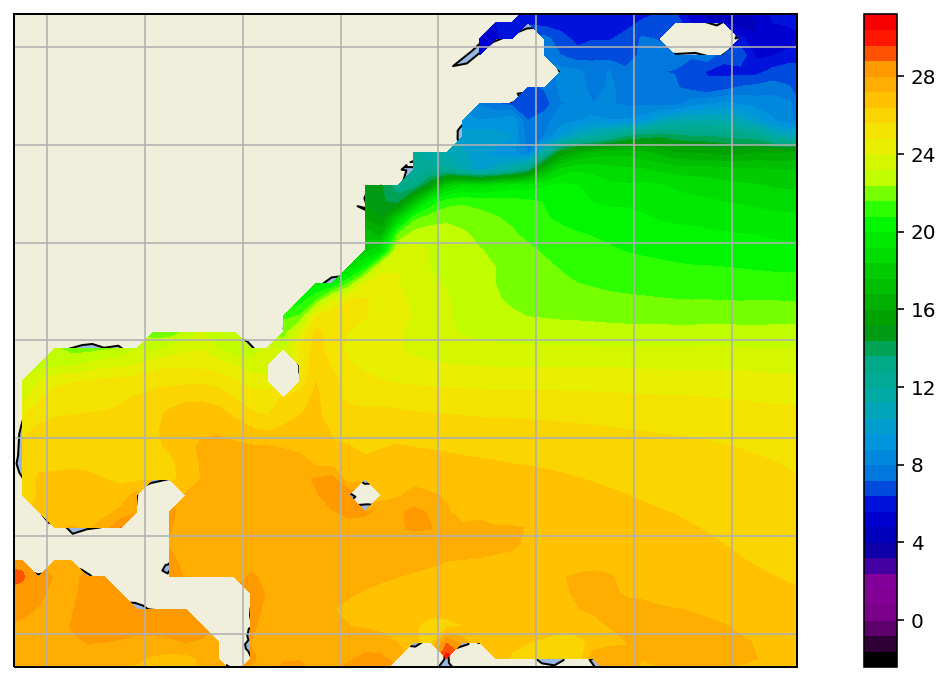

In [16]:
import cartopy.feature as cfeature
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection==ccrs.PlateCarree())#ccrs.Orthographic(-60, -45))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-98, -50, 10, 50], crs=ccrs.PlateCarree())
#ax.set_extent([-110, -20, -10, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

#ax.set_global()
ax.gridlines()


im=ax.contourf(lons, lats, data_20yr_hist,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral',vmin = -2 , vmax=36 , levels=50)
fig.colorbar(im)

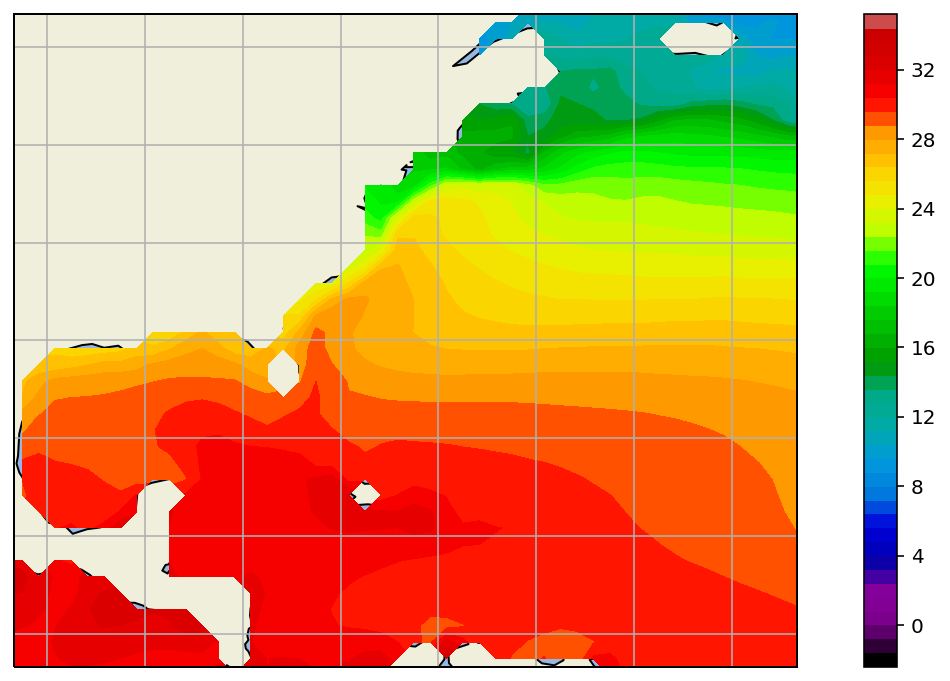

In [17]:
ratio=data_20yr_rcp/data_20yr_hist
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection==ccrs.PlateCarree())#ccrs.Orthographic(-60, -45))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-98, -50, 10, 50], crs=ccrs.PlateCarree())
#ax.set_extent([-110, -20, -10, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

#ax.set_global()
ax.gridlines()


im=ax.contourf(lons, lats, data_20yr_rcp,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral',vmin = -2 , vmax=36, levels=50)
fig.colorbar(im)

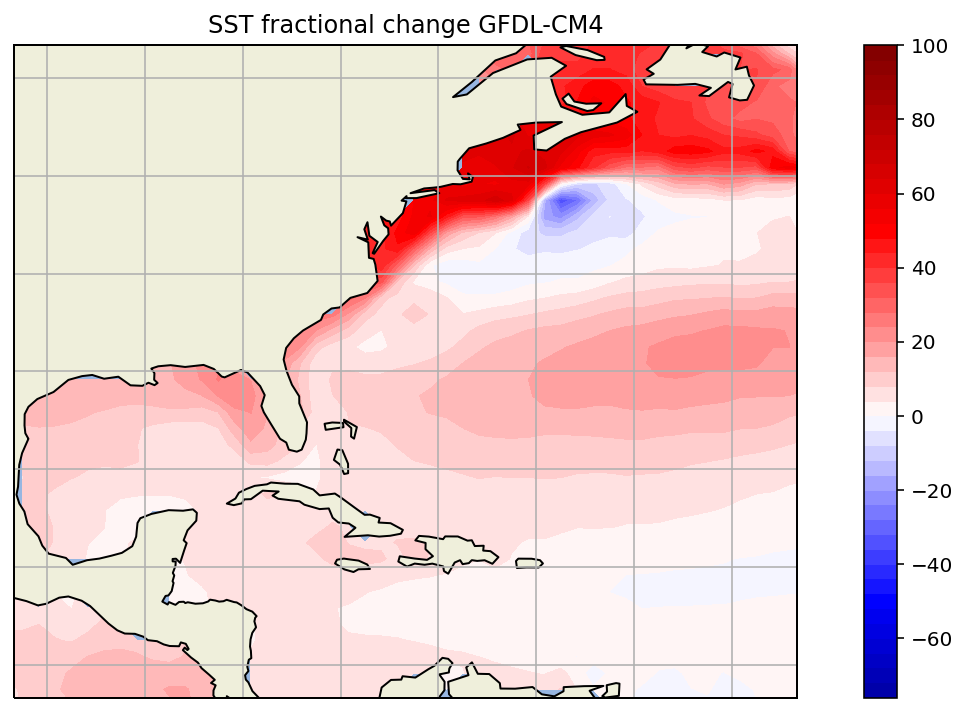

In [31]:
import numpy as np
from matplotlib import cm
#/np.nanmax(data_20yr_rcp-data_20yr_hist)

tropics_change=np.nanmean(data_20yr_rcp[70:110,:]-data_20yr_hist[70:110,:])

ratio=((data_20yr_rcp-data_20yr_hist)-tropics_change)/np.nanmax((data_20yr_rcp-data_20yr_hist)-tropics_change)*100

fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection==ccrs.PlateCarree())#ccrs.Orthographic(-60, -45))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-98, -50, 10, 50], crs=ccrs.PlateCarree())
#ax.set_extent([-110, -20, -10, 50], crs=ccrs.PlateCarree())


#ax.set_global()
ax.gridlines()


im=ax.contourf(lons, lats, ratio,
            transform=ccrs.PlateCarree(),
            cmap='seismic',vmin = -100 , vmax=100,levels=50)
fig.colorbar(im)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
plt.title('SST fractional change GFDL-CM4')
plt.savefig('SST fractional change GFDL-CM4.png')

In [19]:
np.nanmean(data_20yr_rcp-data_20yr_hist)

2.589915

In [23]:
data_20yr_rcp.shape

(180, 360)